# Visualise the activation of convnet filters

In this notebook we will plot all the filters of all the layers in a convolutional network, and try to get an impression of what they do.

The notebook is heavily inspired by [this one](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter09_part03_interpreting-what-convnets-learn.ipynb), written by the author of Keras. If you want to visualise a slightly more complicated neural network, please run through this one as well. Here, in our simpler case, we look at a MNIST digit classifier, like the one from notebook 1.

### Setup

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load data

We load the MNIST data, as before:

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# pixels are 8 bit integers, dividing by 255 normalizes to [0,1]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# (60000,28,28) -> (60000,28,28,1), conv-layers expect channel dimension

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# ^ one_hot encoding

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Define the model

This time, let us use the functional model API to define the network. The structure is identical to notebook 1, but all layers are Keras functions, being applied to the output from the layer before.

In [4]:
# layers are applied sequentially in this order

inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
# Conv2D -> feature maps
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
# MaxPooling -> reduce featuremap dimension
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)


# Define the Model instance
convnet = keras.Model(inputs=inputs, outputs=outputs)

# Print it
convnet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,146 (74.79 KB)

 Trainable params: 19,146 (74.79 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

### <span style="color: red;">Exercise:<span>

Compile and train the model.

In [8]:
batch_size = 128
epochs = 10

# optimizer: updates the models weight during training
# loss: measures difference between models prediciton and actual labels
# the metrics used to evaluate model performance during training


convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


# X_train trains, and is measured against the truth of y_train

# batch_size is the number of training samples that are processed before
# the model's internal parameters are updated. If we have 1000 images
# and a batch size of 100, the model will process 100 images at a time,
# calculate the loss for those images and then update its weights based
# on that loss.

# an epoch is one complete pass through the entire data set.
# For 1000 images, one epoch involves processing all 1000 images once.

# With a dataset of 60 000, a batch size of 128, we have
# 60000/128 = 469 training steps
convnet.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.6289 - loss: 1.1450
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9048 - loss: 0.3152
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9296 - loss: 0.2335
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9404 - loss: 0.1987
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9467 - loss: 0.1749
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9528 - loss: 0.1552
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9578 - loss: 0.1420
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9602 - loss: 0.1341
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9612 - loss: 0.1268
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9634 - loss: 0.1213


### Select an example image

Pick the fourth image in `X_test`, and plot it.

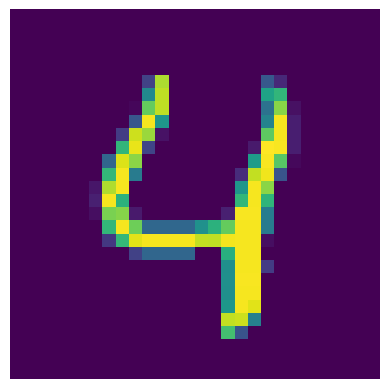

In [9]:
img = X_test[4]

plt.axis("off")
plt.imshow(img)
plt.show()

**Note**: These are grayscale (black-and-white) images, but the default colormap adds some color to them, to make different values easier to perceive. In case you want to plot them in their true grayscale glory, use

```
plt.imshow(img, cmap='gray')
```

in the code above (and below).

### Predict the number

To run the model on our example image, we have to add the batch axis, so that its shape is (1, 28, 28, 1).

The `predict` function outputs the predictions for each class 0-9.


In [10]:
img_tensor = tf.expand_dims(img, axis=0)

preds = convnet.predict(img_tensor)[0]

for i in range(len(preds)):
    print(f'{i}: score = {preds[i]:.4f}')

print()
print(f'Predicted number: {tf.argmax(preds)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0: score = 0.0000
1: score = 0.0000
2: score = 0.0000
3: score = 0.0000
4: score = 1.0000
5: score = 0.0000
6: score = 0.0000
7: score = 0.0000
8: score = 0.0000
9: score = 0.0000

Predicted number: 4


### Get the layer activations

Now, we'll create a new `Model` instance that returns the activations of the convolution (`Conv2D`) and max-pooling (`MaxPooling2D`) layers.

In [11]:
layer_outputs = []
layer_names = []
for layer in convnet.layers:
    print(layer)
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=convnet.input, outputs=layer_outputs)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=conv2d_3, built=True>
<MaxPooling2D name=max_pooling2d_3, built=True>
<Conv2D name=conv2d_4, built=True>
<MaxPooling2D name=max_pooling2d_4, built=True>
<Conv2D name=conv2d_5, built=True>
<MaxPooling2D name=max_pooling2d_5, built=True>
<Flatten name=flatten_1, built=True>
<Dropout name=dropout_1, built=True>
<Dense name=dense_1, built=True>


Run it to get the activations!

In [12]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Plot the activations of the fifth filter of the first layer:

In [13]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


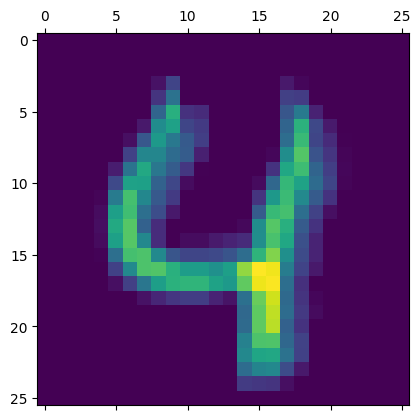

In [14]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5])

### Plot all activations

After running the cell below, right-click the output and select "Disable Scrolling for Outputs", in order to show all plots below each other.

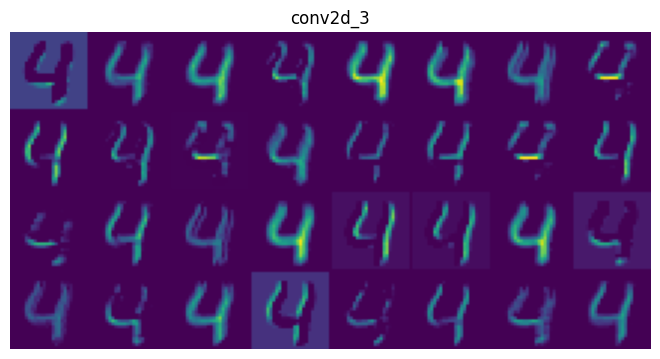

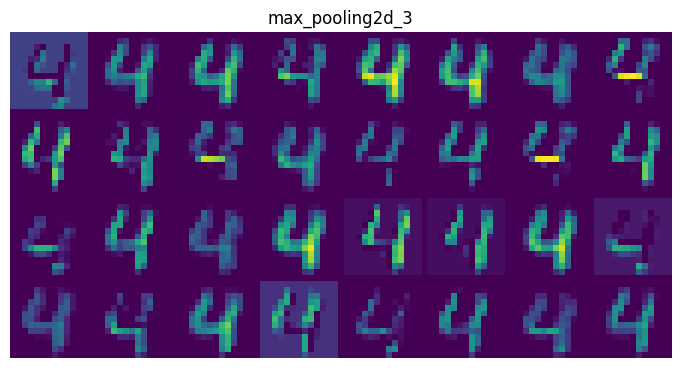

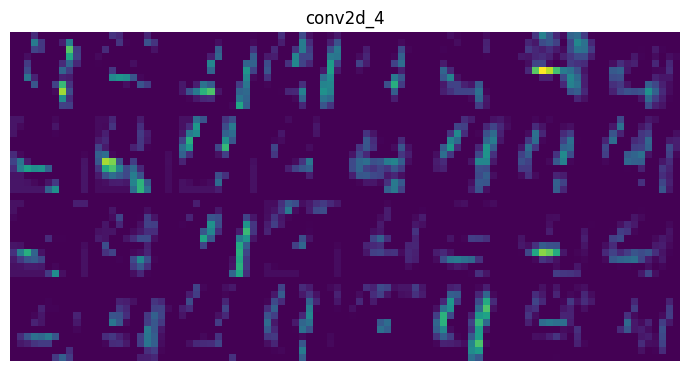

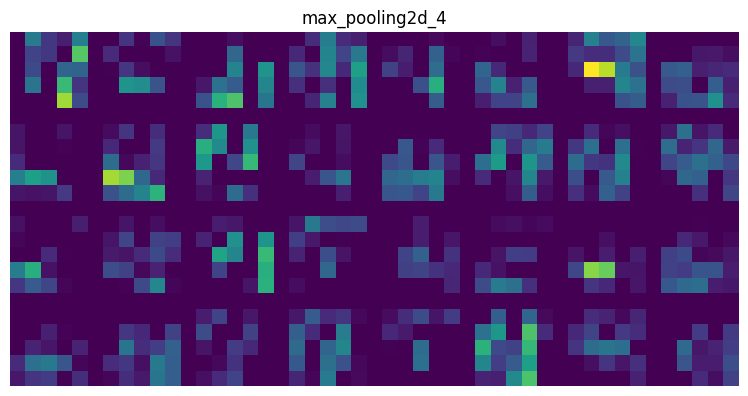

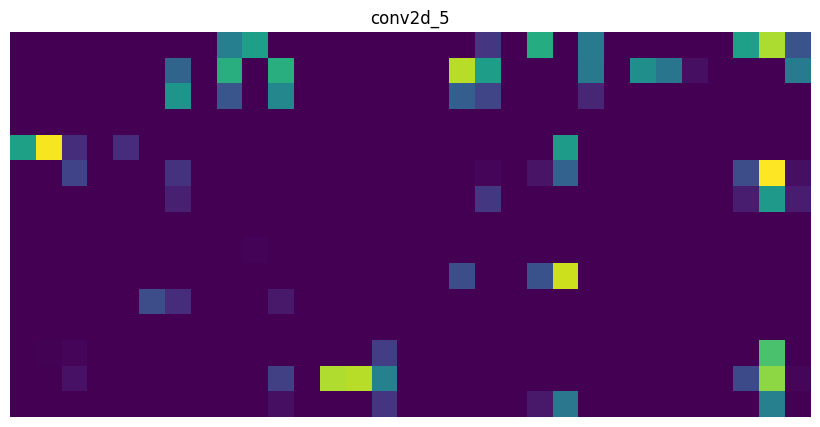

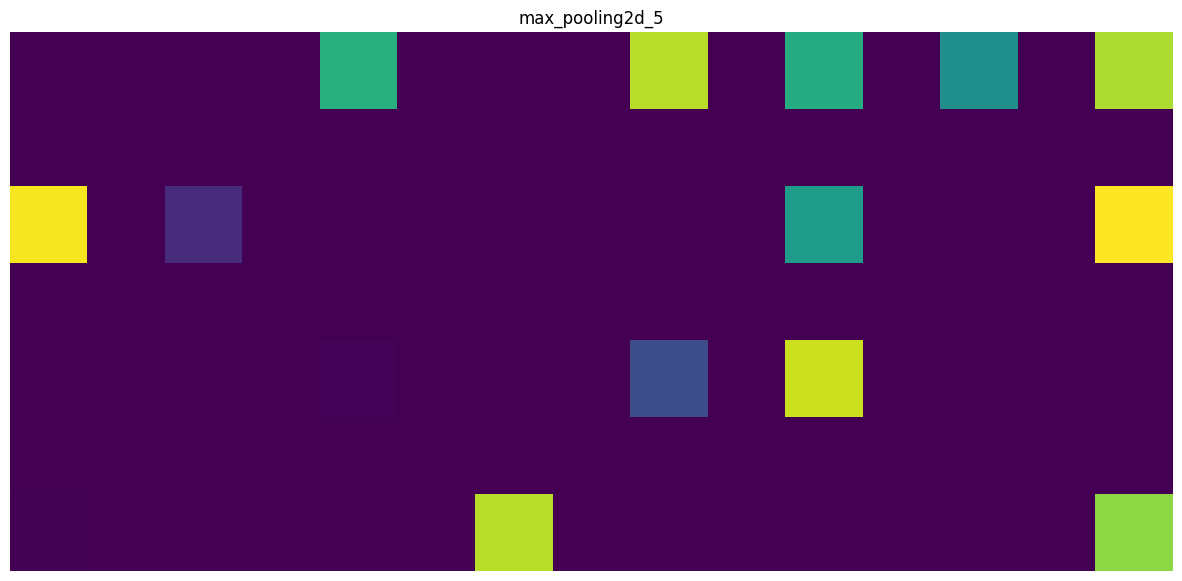

In [15]:
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

### <span style="color: red;">Exercise:<span>

Try to make sense of the plots, by changing the input image to different ones:

- What do the `conv2d_*` layers do?
- What do the `max_pooling_*` layers do?
- Does the information in the successive layers become more clear or less clear?
- Can you relate the pixels in the final layer to the different number predictions?
